In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
import holidays

In [2]:
# Price Data
price_Easy = 'C:/Users/Diego Galdino/OneDrive - Groene Cadans B.V/Algorithms/Energy-Price-Easy/EasyEnergyPrice.csv'
price_Entosoe = 'C:/Users/Diego Galdino/OneDrive - Groene Cadans B.V/Algorithms/Energy-Price-ENTSOE/EntsoeEnergyPrice.csv'

In [3]:
while True:
    # Select price source
    price_source = input("Select the price source:\n1 - Easy\n2 - Entsoe\n")

    # Read price data based on the selected source
    if price_source == "1":
        df_price = pd.read_csv(price_Easy)
        break
    elif price_source == "2":
        df_price = pd.read_csv(price_Entosoe)
        break
    else:
        print("Invalid selection. Try again.")

Select the price source:
1 - Easy
2 - Entsoe
2


In [4]:
# Copy the DataFrame with price data
df = df_price.copy()

# Convert the "Date" column to a date object
df['Date'] = pd.to_datetime(df['Date'])

# Extract the hour from the "Hour" column
df['Hour'] = pd.to_datetime(df['Hour']).dt.time

# Find the minimum date in the dataset
min_date = df['Date'].min()

# Initialize the list for storing cost savings
cost_savings = []

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\2553557447.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Hour']).dt.time


In [5]:
# Define the battery sizes to be analyzed
initial_size = 10
size_increment = 10
num_sizes = 10
battery_sizes = [initial_size + i * size_increment for i in range(num_sizes)]

# Initialize the total cost savings variable
total_cost_savings = 0

In [6]:
#test_hour = min_date['Hour'].min()

In [7]:
# Loop through each day starting from the minimum date
current_date = min_date
while current_date <= df['Date'].max():
    # Filter the data for the current day
    df_current_day = df[df['Date'] == current_date]

    # Set the price threshold to identify peak and off-peak hours for the current day
    peak_price_threshold = df_current_day['Import Grid (EUR/kWh)'].max()  # Example: 80th percentile

    # Function to identify peak and off-peak hours for the current day
    def identify_peak_offpeak(price):
        if price > peak_price_threshold:
            return 'Peak'
        else:
            return 'Off-peak'

    # Add a column to the DataFrame indicating whether the hour is peak or off-peak for the current day
    df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)

    # Function to calculate the cost savings for a given battery size for the current day
    def calculate_cost_savings(dataframe, battery_size):
        initial_investment = battery_size * 1000  # 1000 EUR/kWh
        offpeak_hours = len(dataframe[dataframe['Peak/Off-peak'] == 'Off-peak'])
        price_difference = dataframe[dataframe['Peak/Off-peak'] == 'Off-peak']['Import Grid (EUR/kWh)'].mean() - dataframe[dataframe['Peak/Off-peak'] == 'Peak']['Import Grid (EUR/kWh)'].mean()
        cost_savings = initial_investment / 10 + offpeak_hours * price_difference * 24  # 24 hours
        return cost_savings

    # Calculate the cost savings for each battery size for the current day
    cost_savings_day = []
    for size in battery_sizes:
        # Calculate the cost savings for the current battery size and day
        savings = calculate_cost_savings(df_current_day, size)
        cost_savings_day.append(savings)
        # Increment the total cost savings
        total_cost_savings += savings

    # Add the cost savings for the current day to the list
    cost_savings.append(cost_savings_day)

    # Increment to the next day
    current_date += pd.DateOffset(days=1)

# Transpose the list of cost savings to prepare for plotting
cost_savings = list(zip(*cost_savings))

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537771057.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_day['Peak/Off-peak'] = df_current_day['Import Grid (EUR/kWh)'].apply(identify_peak_offpeak)
C:\Users\Diego Galdino\AppData\Local\Temp\ipykernel_16660\1537

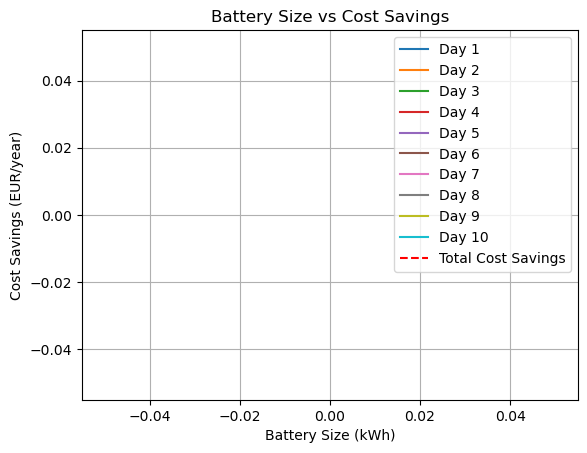

In [8]:
# Plot the compiled graph with average cost savings
plt.figure()
for day, savings in enumerate(cost_savings):
    plt.plot(battery_sizes, savings[:len(battery_sizes)], label=f"Day {day + 1}")

# Add a line for the total cost savings
plt.axhline(y=total_cost_savings, color='r', linestyle='--', label='Total Cost Savings')

plt.xlabel('Battery Size (kWh)')
plt.ylabel('Cost Savings (EUR/year)')
plt.title('Battery Size vs Cost Savings')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Print the total cost savings
print(f"Total Cost Savings: {total_cost_savings} EUR/year")

Total Cost Savings: nan EUR/year
